# Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender = pd.read_csv('gender_submission.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df1 = test.merge(gender,how = 'inner', on = 'PassengerId')

In [5]:
df2 = pd.concat([df1,train], axis = 0)

In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# Data Cleansing

In [7]:
df2.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [8]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [9]:
df2['Cabin'] = df2["Cabin"].fillna('Missing')

In [10]:
df2 = df2.dropna()

In [11]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [12]:
df2['Cabin'].unique()

array(['Missing', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78',
       'D34', 'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61',
       'C53', 'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46',
       'C116', 'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97',
       'D22', 'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34',
       'C62 C64', 'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21',
       'C89', 'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69', 'D47',
       'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80', 'A31',
       'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99',
       'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124'

In [13]:
df2['Cabin'] = df2['Cabin'].astype(str).str[0]

In [14]:

df2['Cabin'].value_counts()

M    1013
C      94
B      63
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [15]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

# Exploratory Data Analysis

In [16]:
df2 = df2.drop(['PassengerId','Ticket'], axis = 1)

In [17]:
pd.pivot_table(df2, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.330223,23.879124,0.312039,0.497543
1,28.994121,48.684715,0.508130,0.504065


In [18]:
pd.pivot_table(df2, index = 'Cabin', values = ['Age','SibSp','Parch','Fare'] )

,Age,Fare,Parch,SibSp
Cabin,,,,
A,42.211064,41.244314,0.181818,0.181818
B,35.837496,123.728573,0.682540,0.460317
C,37.659246,107.926598,0.414894,0.680851
D,38.848360,53.007339,0.260870,0.413043
E,37.515693,54.564634,0.390244,0.341463
F,22.554448,18.079367,0.523810,0.428571
G,12.000000,14.205000,1.200000,0.600000
M,27.960240,19.132707,0.368213,0.504442
T,45.000000,35.500000,0.000000,0.000000


In [19]:
pd.pivot_table(df2, index = 'Survived', columns = 'Cabin', values = 'Name', aggfunc = 'count')

Cabin,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0,12.0,21.0,40.0,16.0,13.0,10.0,2.0,699.0,1.0
1,10.0,42.0,54.0,30.0,28.0,11.0,3.0,314.0,NaN


In [20]:
df2.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000
mean,2.296325,29.826883,0.50000,0.385911,33.223956,0.376723
std,0.837037,12.837284,1.04258,0.866357,51.765986,0.484750
min,1.000000,0.170000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.00000,0.000000,7.895800,0.000000
50%,3.000000,29.881138,0.00000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.00000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.00000,9.000000,512.329200,1.000000


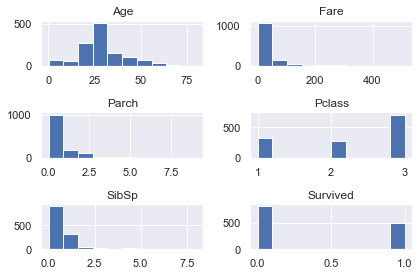

In [21]:
df2.hist()
plt.tight_layout()
plt.show()

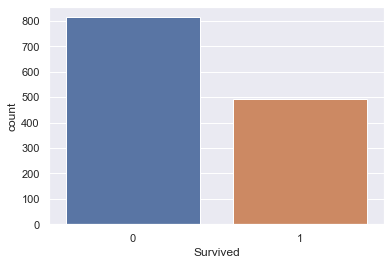

In [22]:
df_cat = ['Survived','Pclass','Sex','Cabin','Embarked']

sns.countplot(x = 'Survived',  data = df2)

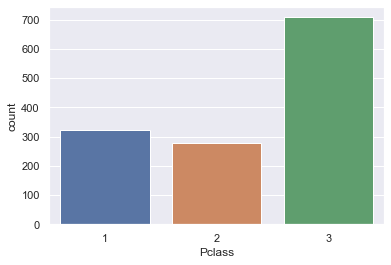

In [23]:
sns.countplot(x = 'Pclass', data = df2)

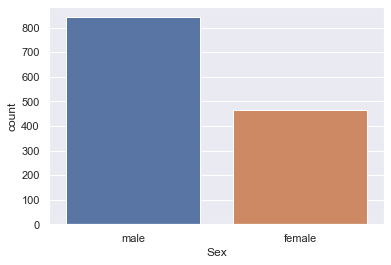

In [24]:
sns.countplot(x = 'Sex', data = df2)

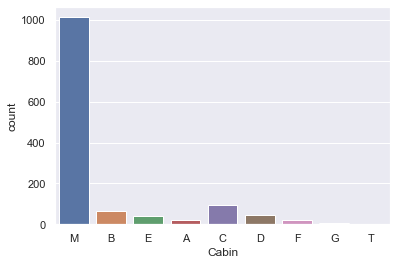

In [25]:
sns.countplot( x = 'Cabin', data = df2)

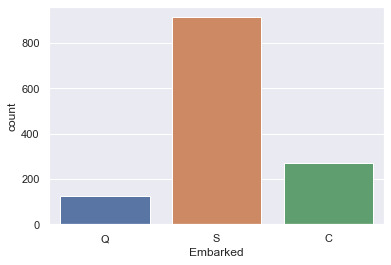

In [26]:
sns.countplot( x = 'Embarked', data = df2)

# Feature Engineering

In [27]:
df2['teenager_or_adult'] = np.where(df2['Age'] > 18, 'Adult','Teenager')

In [28]:
df2['teenager_or_adult'].value_counts()

Adult       1113
Teenager     193
Name: teenager_or_adult, dtype: int64

In [29]:
dictionary = {'B':'Rare',
             'C': 'Rare',
             'E':'Rare',
             'A':'Rare',
             'D':'Rare',
             'F':'Rare',
             'G':'Rare',
             'T':'Rare',
             'M':'Missing'}

df2['Cabin'] = df2['Cabin'].map(dictionary)

In [30]:
df2['Cabin'].value_counts()

Missing    1013
Rare        293
Name: Cabin, dtype: int64

In [31]:
dictionary_2 = {'S':'S',
               'Q': 'Rare',
               'C': 'Rare'}

df2['Embarked'] = df2['Embarked'].map(dictionary_2)

In [32]:
df2['Embarked'].value_counts()

S       913
Rare    393
Name: Embarked, dtype: int64

In [33]:
df2.drop('Name', axis = 1, inplace = True)

In [34]:
df2['Fare'] = np.log(df2['Fare']+1)

In [35]:
dummies = pd.get_dummies(df2[['Pclass','Sex','Cabin','Embarked','teenager_or_adult']], drop_first = True)

In [36]:
df3 = pd.concat([df2,dummies], axis = 1)

In [37]:
df3.drop(['Pclass','Sex','Cabin','Embarked','teenager_or_adult'], axis = 1, inplace = True)

In [38]:
# removing outliers
from feature_engine.outlier_removers import Winsorizer
winsorizer = Winsorizer(distribution = 'skewed', tail = 'both', fold = 1.5, variables =['Age','Fare','SibSp','Parch'])
winsorizer.fit(df3)
df4 = winsorizer.transform(df3)


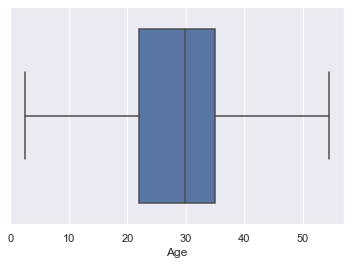

In [39]:
sns.boxplot(x = 'Age', data = df4)
plt.show()

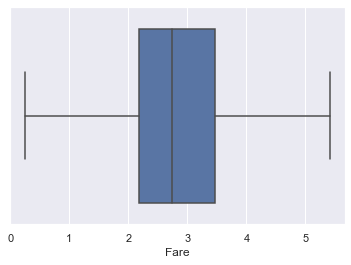

In [40]:
sns.boxplot(x = 'Fare', data = df4)
plt.show()

# Machine Learning

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [42]:
X = df4[df4.drop('Survived', axis = 1).columns].values
y = df4['Survived'].values

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [64]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
lr_score = accuracy_score(y_test, predictions)
lr_score

0.8664122137404581

In [45]:
tree = DecisionTreeClassifier()

tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
              
grid = GridSearchCV(tree, tree_param, cv = 5)
grid.fit(x_train,y_train)
param = grid.best_params_
print(param)

{'criterion': 'entropy', 'max_depth': 6}


In [46]:
tree_grid = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
tree_grid.fit(x_train, y_train)
predictions = tree_grid.predict(x_test)
tree_score = accuracy_score(y_test, predictions)
tree_score


0.8473282442748091

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 2)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
grid = GridSearchCV(rf, grid_rf, cv = 5,verbose = True, n_jobs = -1)
grid.fit(x_train,y_train)
params = grid.best_params_
print(params)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  4.2min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [66]:
rf_grid = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt',
                                 max_depth = 90, bootstrap = True, random_state = 0)

rf_grid.fit(x_train,y_train)
predictions = rf_grid.predict(x_test)
rf_score = accuracy_score(y_test, predictions)
rf_score

0.8587786259541985

In [56]:
svm = SVC(kernel = 'linear', probability = True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
svm.fit(x_scaled,y_train)
predictions = svm.predict(x_test)
score = accuracy_score(y_test, predictions)
score

0.5801526717557252

In [58]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

grid = GridSearchCV(svm, param_grid, cv = 5, verbose = True, n_jobs = -1)
grid.fit(x_scaled,y_train)
params = grid.best_params_
print(params)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    9.4s finished


In [63]:
svm2 = SVC(C = 10, gamma = 0.1, kernel = 'rbf', probability = True)
svm2.fit(x_train, y_train)
predictions = svm2.predict(x_test)
svm_score = accuracy_score(y_test, predictions)
svm_score

0.8549618320610687

In [74]:

table = pd.DataFrame(data = [lr_score,tree_score,rf_score, svm_score], index = ['LR','DT','RF','SVM'], columns = ['Algorithm'])
table

,Algorithm
LR,0.866412
DT,0.847328
RF,0.858779
SVM,0.854962


Default Logistic Regression has the highest accuracy score of 87%